# Homework 5: Solutions


<br>
**Conceptual: ** Short answer questions. Be concise.

---
(1) Consider the problem of classifying a binary response variable (i.e., $y \in \{1,0\}$). If there is no overlap in the values of X when y = 1 and when y=0,  such that there is a large “gap” between the two distributions of X values, then this is problematic for one of the classifiers discussed in class and the text. What classifier does this situation pose a problem for? Explain conceptually why this is a problem and compare it with another classifier approach that does not suffer this limitation.

**Answer:** 
* This poses a problem for a logistic regression classifier. Without a sharp decision boundary between the two distributions of Y, the parameter estimates for the logistic function become unstable (i.e., there are many possible values of the regression parameters that could separate the two distributions).


---
(2). Compare logistic regression, LDA, and kNN classification approaches. Which are parametric which are non-parametric? For parametric models what functions do they assume? For non-parametric methods, how do the classifiers separate groups? How is the flexibility/bias tradeoff adjusted for each method?

**Answer:** 
* Logistic regression is a parametric classifier that assumes the separation between the two classes of Y follows a logistic function. Values of Y are categorized based off of a threshold applied to the fit logistic function. Flexibility depends on the number of predictor variables used (more variables = higher flexibility)
* LDA is a Bayesian parametric classifier that assumes that classes of Y are represented by distinct Gaussian distributions in the space of X. Values of Y are categorized by picking the underlying distribution that has the highest probability of including each unique observation of X. Flexibility depends on whether equal variances are assumed for each underlying distribution (i.e. LDA vs. QDA), but within the standard LDA there is no way to manipulate flexibility of the model.
* kNN is a non-parametric classifier that determines the class of Y by looking at the k-nearest neighbors of each observation and assigning the class most often observed amongst these neighboring points. Flexibility is determined by K, such that lower values of K result in more flexible models.


---
(3) What is the curse of dimensionality? Why is it especially problematic for kNN classification (i.e., why does kNN fail in high dimensional contexts)?

**Answer:**
* The curse of dimensionality reflects scenarios where the number of predictors (p) approaches the number of observations (n). This is especially problematic for kNN because you will begin to find situations where observations do not have enough nearby neighbors. Therefore the method has to look across great distances (i.e., not so near neighbors) in order to work.



---
(4) Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

**Answer:** 
* For KNN with K=1, the training error rate is 0% because for any training observation, its nearest neighbor will be the response itself. So, that means that KNN has a test error rate of 36%. Thus logistic regression is preferred because of its lower test error rate of only 30%.

---
**Applied:** Show your code & plots

Do applied exercises 4.10 and 4.11 from ISLR as well as question 5 below.

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


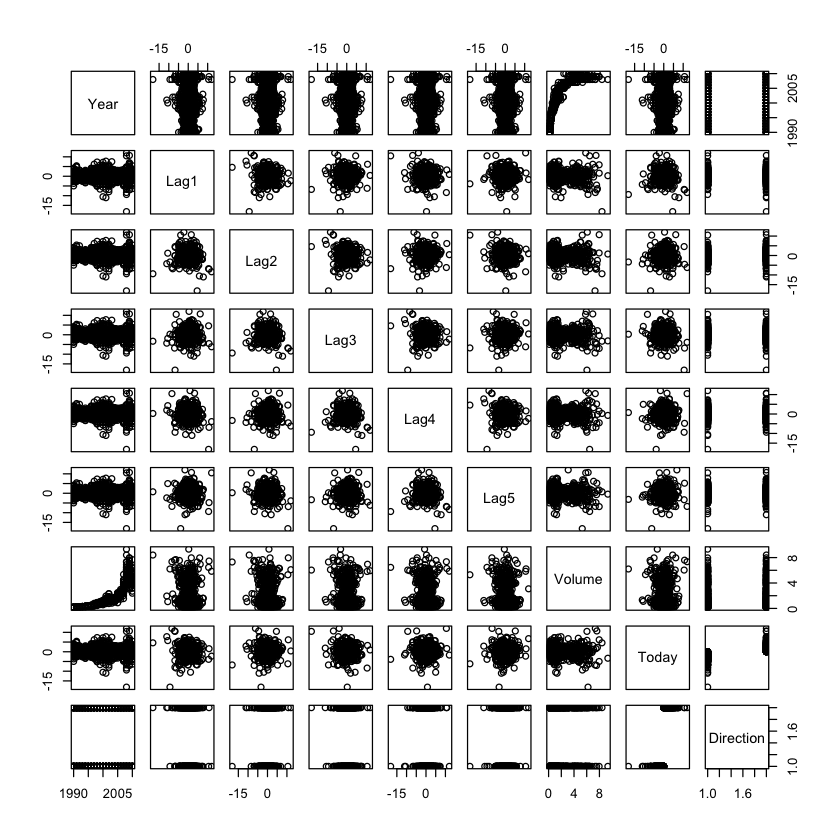

In [24]:
# ------------------
# Exercize 4.10
# ------------------

# (a)
library(ISLR)
summary(Weekly)
pairs(Weekly)
cor(Weekly[, -9])
# Year and Volume appear to have a relationship. No other patterns are discernible.


In [26]:
# (b)
attach(Weekly)
glm.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, 
    family = binomial)
summary(glm.fit)
# Lag 2 appears to have some statistical significance with a Pr(>|z|) = 3%.

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year

The following objects are masked from Weekly (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


In [27]:
# (c)
glm.probs = predict(glm.fit, type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction)

# Percentage of currect predictions: (54+557)/(54+557+48+430) = 56.1%. Weeks the market 
# goes up the logistic regression is right most of the time, 557/(557+48) = 92.1%. Weeks the 
# market goes up the logistic regression is wrong most of the time 54/(430+54) = 11.2%.

        Direction
glm.pred Down  Up
    Down   54  48
    Up    430 557

In [28]:
# (d)
train = (Year < 2009)
Weekly.0910 = Weekly[!train, ]
glm.fit = glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = train)
glm.probs = predict(glm.fit, Weekly.0910, type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
Direction.0910 = Direction[!train]
table(glm.pred, Direction.0910)
mean(glm.pred == Direction.0910)
# 0.625

        Direction.0910
glm.pred Down Up
    Down    9  5
    Up     34 56

[1] 0.625

In [5]:
# (e)
library(MASS)
lda.fit = lda(Direction ~ Lag2, data = Weekly, subset = train)
lda.pred = predict(lda.fit, Weekly.0910)
table(lda.pred$class, Direction.0910)
mean(lda.pred$class == Direction.0910)
# 0.625

      Direction.0910
       Down Up
  Down    9  5
  Up     34 56

[1] 0.625

In [29]:
# (f)
qda.fit = qda(Direction ~ Lag2, data = Weekly, subset = train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class == Direction.0910)
# A correctness of 58.7% even though it picked Up every time.

         Direction.0910
qda.class Down Up
     Down    0  0
     Up     43 61

[1] 0.5865385

In [30]:
# (g)
library(class)
train.X = as.matrix(Lag2[train])
test.X = as.matrix(Lag2[!train])
train.Direction = Direction[train]
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)
#  0.50

        Direction.0910
knn.pred Down Up
    Down   21 30
    Up     22 31

[1] 0.5

In [8]:
# (h)
# Logistic regression and LDA methods provide similar test error rates.

In [31]:
# (i)
# LDA
glm.fit = glm(Direction ~ Lag2:Lag1, data = Weekly, family = binomial, subset = train)
glm.probs = predict(glm.fit, Weekly.0910, type = "response")
glm.pred = rep("Down", length(glm.probs))
glm.pred[glm.probs > 0.5] = "Up"
Direction.0910 = Direction[!train]
table(glm.pred, Direction.0910)
# 0.5769

# QDA
qda.fit = qda(Direction ~ Lag2 + sqrt(abs(Lag2)), data = Weekly, subset = train)
qda.class = predict(qda.fit, Weekly.0910)$class
table(qda.class, Direction.0910)
mean(qda.class == Direction.0910)
# 0.5769

# kNN, k = 10
knn.pred = knn(train.X, test.X, train.Direction, k = 10)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)
# 0.5769

# kNN, k=100
knn.pred = knn(train.X, test.X, train.Direction, k = 100)
table(knn.pred, Direction.0910)
mean(knn.pred == Direction.0910)
# 0.5577

        Direction.0910
glm.pred Down Up
    Down    1  1
    Up     42 60

         Direction.0910
qda.class Down Up
     Down   12 13
     Up     31 48

[1] 0.5769231

        Direction.0910
knn.pred Down Up
    Down   17 18
    Up     26 43

[1] 0.5769231

        Direction.0910
knn.pred Down Up
    Down    9 12
    Up     34 49

[1] 0.5576923

---

In [13]:
# ------------------
# Exercize 4.11
# ------------------

# (a)
library(ISLR)
summary(Auto)
attach(Auto)
mpg01 = rep(0, length(mpg))
mpg01[mpg > median(mpg)] = 1
Auto = data.frame(Auto, mpg01)


      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
                                                                               
  acceleration        year           origin                      name    
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   amc matador       :  5  
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   ford pinto        :  5  
 Median :15.50   Median :76.00   Median :1.000   toyota corolla    :  5  
 Mean   :15.54   Mean   :75.98   Mean   :1.577   amc gremlin    

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


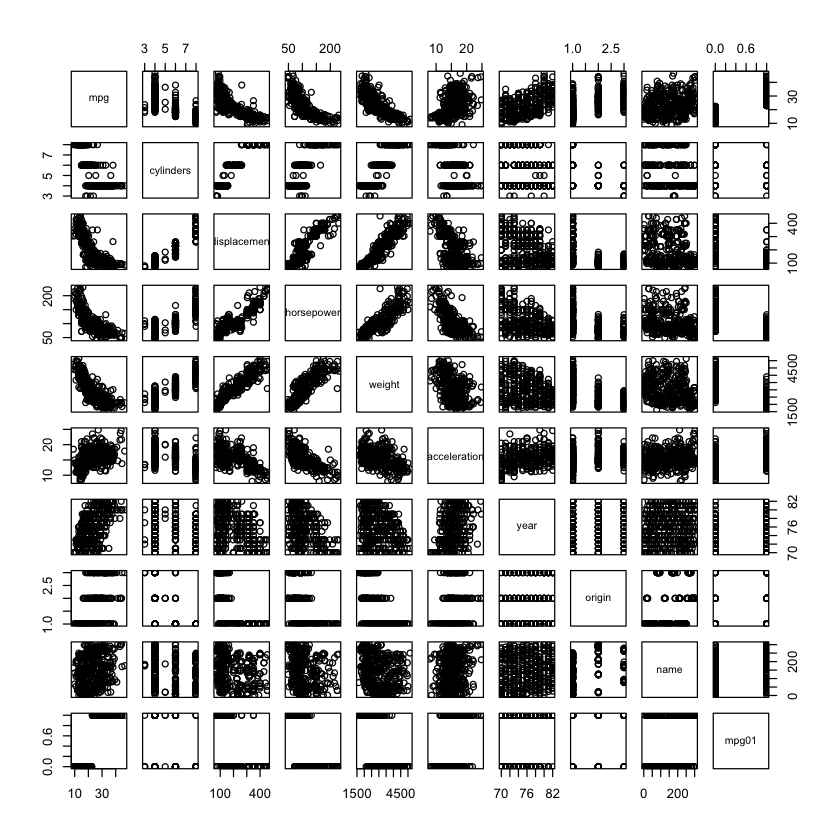

In [14]:
# (b)
cor(Auto[, -9])
pairs(Auto)  
# This doesn't work well since mpg01 is 0 or 1
# Anti-correlated with cylinders, weight, displacement, horsepower. (mpg, of course)

In [15]:
# (c)
train = (year%%2 == 0)  # if the year is even
test = !train
Auto.train = Auto[train, ]
Auto.test = Auto[test, ]
mpg01.test = mpg01[test]

In [16]:
# (d)
# LDA
library(MASS)
lda.fit = lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)
lda.pred = predict(lda.fit, Auto.test)
mean(lda.pred$class != mpg01.test)
# 0.1264

[1] 0.1263736

In [17]:
# (e)
# QDA
qda.fit = qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)
qda.pred = predict(qda.fit, Auto.test)
mean(qda.pred$class != mpg01.test)
# 0.1319

[1] 0.1318681

In [18]:
# (f)
# Logistic regression
glm.fit = glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    family = binomial, subset = train)
glm.probs = predict(glm.fit, Auto.test, type = "response")
glm.pred = rep(0, length(glm.probs))
glm.pred[glm.probs > 0.5] = 1
mean(glm.pred != mpg01.test)
# 0.1209

[1] 0.1208791

In [20]:
# (g)
library(class)
train.X = cbind(cylinders, weight, displacement, horsepower)[train, ]
test.X = cbind(cylinders, weight, displacement, horsepower)[test, ]
train.mpg01 = mpg01[train]
set.seed(1)

# KNN(k=1)
knn.pred = knn(train.X, test.X, train.mpg01, k = 1)
mean(knn.pred != mpg01.test)
# 0.1538

# KNN(k=10)
knn.pred = knn(train.X, test.X, train.mpg01, k = 10)
mean(knn.pred != mpg01.test)
# 0.1648

# KNN(k=100)
knn.pred = knn(train.X, test.X, train.mpg01, k = 100)
mean(knn.pred != mpg01.test)
# 0.1429

# k=1, 15.4% test error rate. k=10, 16.5% test error rate. k=100, 14.3% test error rate. 
# K of 100 seems to perform the best (i.e. using 100 nearest neighbors).

[1] 0.1538462

[1] 0.1648352

[1] 0.1428571